## Deep Transfer Learning with FCN on DNA Sequence Dataset

By: Sk. Tanzir Mehedi

Importing libraries

In [ ]:
import time
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import TensorBoard
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Importing the Dataset

In [ ]:
dataset=pd.read_csv('preprocessedDNASequenceDatase.csv')

Exploratory Data Analysis

In [ ]:
dataset.head()

,page_like,page_followers,page_category,familiar,symbol,age,sex,post_category,post_views,post_share,post_comments,post_comment_type,post_like,post_love,post_smile,post_care,post_wow,post_angry,post_sad,label
0,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.004926,0.000009,4.900000e-07,0.000008,0.333333,0.000025,6.120000e-07,0.000082,0.000013,0.000034,0.000197,0.000050,1
1,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,5.310000e-06,0.000027,0.333333,0.000037,4.080000e-07,0.000072,0.000025,0.000024,0.000705,0.000100,1
2,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,7.780000e-06,0.000077,0.333333,0.000041,8.160000e-07,0.000002,0.000132,0.000136,0.000082,0.000064,1
3,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,3.960000e-06,0.000043,0.333333,0.000040,2.650000e-06,0.000003,0.000025,0.000034,0.000918,0.000241,1
4,0.604743,0.62549,0,1,0.583333,0.0,1.0,0.009852,0.000000,1.820000e-06,0.000043,0.333333,0.000022,1.220000e-06,0.000005,0.000069,0.000034,0.001098,0.000018,1


In [ ]:
properties = list(dataset.columns.values)
properties.remove('label')
X = dataset[properties]
y = dataset['label']

Split Dataset into Training Set and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Check the nb classes

In [ ]:
nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
nb_classes

2

Transform the labels from integers to one hot vectors

In [ ]:
enc = sklearn.preprocessing.OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))

y_train = enc.transform(y_train.values.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.values.reshape(-1, 1)).toarray()

Save orignal y because later we will use binary

In [ ]:
y_true = np.argmax(y_test, axis=1)

If univariate then add a dimension to make it multivariate with one dimension

In [ ]:
 if len(X_train.shape) == 2: 
        X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
        input_shape = X_train.shape[1:]

Making the Model

In [ ]:
input_layer = keras.layers.Input(input_shape)

# Fully connected layer 1

conv1 = keras.layers.Conv1D(filters=128, kernel_size=8, padding='same')(input_layer)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.Activation(activation='relu')(conv1)

# Fully connected layer 2

conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

# Fully connected layer 3

conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

# Gap lager

gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)

# Output layer

output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

Compile the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 128)           1152      
_________________________________________________________________
batch_normalization (BatchNo (None, 19, 128)           512       
_________________________________________________________________
activation (Activation)      (None, 19, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19, 256)           164096    
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 256)           1024      
_________________________________________________________________
activation_1 (Activation)    (None, 19, 256)          

Result View with TensorBoard

In [ ]:
NAME = "FCN on DNA Seeuence Dataset"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME), histogram_freq = 1, profile_batch = 5)

Fitting the model

In [ ]:
# X_test and y_test are only used to monitor the test loss and NOT for training

mini_batch_size = 64
nb_epochs = 1000

start_time = time.time()
history=model.fit(X_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs, validation_data=(X_test, y_test),callbacks=[tensorboard])
duration = time.time() - start_time

Epoch 1/1000
 4/55 [=>............................] - ETA: 2s - loss: 0.4370 - accuracy: 0.7969WARNING:tensorflow:From C:\Users\tusar lahiri\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
55/55 [==============================] - 19s 347ms/step - loss: 0.1077 - accuracy: 0.9683 - val_loss: 0.1538 - val_accuracy: 0.9714
Epoch 2/1000
55/55 [==============================] - 5s 84ms/step - loss: 0.0600 - accuracy: 0.9826 - val_loss: 0.1432 - val_accuracy: 0.9714
Epoch 3/1000
55/55 [==============================] - 4s 81ms/step - loss: 0.0574 - accuracy: 0.9831 - val_loss: 0.1791 - val_accuracy: 0.9714
Epoch 4/1000
55/55 [==============================] - 4s 79ms/step - loss: 0.0591 - accuracy: 0.9840 - val_loss: 0.1850 - val_accuracy: 0.9714
Epoch 5/1000
55/55 [======================

55/55 [==============================] - 4s 72ms/step - loss: 0.0331 - accuracy: 0.9871 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 56/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.0425 - val_accuracy: 0.9900
Epoch 57/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0331 - accuracy: 0.9880 - val_loss: 0.0423 - val_accuracy: 0.9907
Epoch 58/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0325 - accuracy: 0.9883 - val_loss: 0.0377 - val_accuracy: 0.9907
Epoch 59/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0311 - accuracy: 0.9891 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 60/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0311 - accuracy: 0.9894 - val_loss: 0.0348 - val_accuracy: 0.9907
Epoch 61/1000
55/55 [==============================] - 4s 69ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0417 - val_accuracy: 0.9893
Epoch 

Epoch 112/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0306 - accuracy: 0.9891 - val_loss: 0.0396 - val_accuracy: 0.9893
Epoch 113/1000
55/55 [==============================] - 4s 79ms/step - loss: 0.0280 - accuracy: 0.9897 - val_loss: 0.0443 - val_accuracy: 0.9907
Epoch 114/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0287 - accuracy: 0.9889 - val_loss: 0.0393 - val_accuracy: 0.9900
Epoch 115/1000
55/55 [==============================] - 4s 73ms/step - loss: 0.0297 - accuracy: 0.9897 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 116/1000
55/55 [==============================] - 4s 77ms/step - loss: 0.0302 - accuracy: 0.9871 - val_loss: 0.0409 - val_accuracy: 0.9907
Epoch 117/1000
55/55 [==============================] - 4s 69ms/step - loss: 0.0281 - accuracy: 0.9886 - val_loss: 0.0403 - val_accuracy: 0.9907
Epoch 118/1000
55/55 [==============================] - 4s 75ms/step - loss: 0.0276 - accuracy: 0.9883 - val_loss: 0.0350 - val_ac

55/55 [==============================] - 4s 67ms/step - loss: 0.0272 - accuracy: 0.9883 - val_loss: 0.0384 - val_accuracy: 0.9900
Epoch 169/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0269 - accuracy: 0.9886 - val_loss: 0.0382 - val_accuracy: 0.9900
Epoch 170/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0264 - accuracy: 0.9889 - val_loss: 0.0399 - val_accuracy: 0.9907
Epoch 171/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0262 - accuracy: 0.9889 - val_loss: 0.0369 - val_accuracy: 0.9907
Epoch 172/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0271 - accuracy: 0.9886 - val_loss: 0.0400 - val_accuracy: 0.9907
Epoch 173/1000
55/55 [==============================] - 4s 65ms/step - loss: 0.0263 - accuracy: 0.9889 - val_loss: 0.0392 - val_accuracy: 0.9907
Epoch 174/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0278 - accuracy: 0.9886 - val_loss: 0.0441 - val_accuracy: 0.9873


55/55 [==============================] - 4s 71ms/step - loss: 0.0253 - accuracy: 0.9897 - val_loss: 0.0447 - val_accuracy: 0.9907
Epoch 225/1000
55/55 [==============================] - 4s 69ms/step - loss: 0.0266 - accuracy: 0.9883 - val_loss: 0.0418 - val_accuracy: 0.9907
Epoch 226/1000
55/55 [==============================] - 4s 69ms/step - loss: 0.0262 - accuracy: 0.9889 - val_loss: 0.0390 - val_accuracy: 0.9900
Epoch 227/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0266 - accuracy: 0.9883 - val_loss: 0.0404 - val_accuracy: 0.9907
Epoch 228/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0255 - accuracy: 0.9897 - val_loss: 0.0460 - val_accuracy: 0.9907
Epoch 229/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0252 - accuracy: 0.9897 - val_loss: 0.0418 - val_accuracy: 0.9907
Epoch 230/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0272 - accuracy: 0.9883 - val_loss: 0.0459 - val_accuracy: 0.9893


55/55 [==============================] - 4s 71ms/step - loss: 0.0241 - accuracy: 0.9897 - val_loss: 0.0400 - val_accuracy: 0.9887
Epoch 281/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0244 - accuracy: 0.9900 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 282/1000
55/55 [==============================] - 4s 73ms/step - loss: 0.0245 - accuracy: 0.9886 - val_loss: 0.0435 - val_accuracy: 0.9887
Epoch 283/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0261 - accuracy: 0.9889 - val_loss: 0.0418 - val_accuracy: 0.9867
Epoch 284/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0256 - accuracy: 0.9894 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 285/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0243 - accuracy: 0.9891 - val_loss: 0.0397 - val_accuracy: 0.9907
Epoch 286/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0244 - accuracy: 0.9894 - val_loss: 0.0399 - val_accuracy: 0.9900


55/55 [==============================] - 5s 84ms/step - loss: 0.0233 - accuracy: 0.9894 - val_loss: 0.0393 - val_accuracy: 0.9900
Epoch 337/1000
55/55 [==============================] - 3s 62ms/step - loss: 0.0261 - accuracy: 0.9897 - val_loss: 0.0474 - val_accuracy: 0.9907
Epoch 338/1000
55/55 [==============================] - 4s 64ms/step - loss: 0.0242 - accuracy: 0.9891 - val_loss: 0.0429 - val_accuracy: 0.9900
Epoch 339/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0240 - accuracy: 0.9889 - val_loss: 0.0480 - val_accuracy: 0.9907
Epoch 340/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0229 - accuracy: 0.9897 - val_loss: 0.0445 - val_accuracy: 0.9907
Epoch 341/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0246 - accuracy: 0.9897 - val_loss: 0.0442 - val_accuracy: 0.9867
Epoch 342/1000
55/55 [==============================] - 4s 64ms/step - loss: 0.0250 - accuracy: 0.9891 - val_loss: 0.0433 - val_accuracy: 0.9907


55/55 [==============================] - 4s 65ms/step - loss: 0.0227 - accuracy: 0.9909 - val_loss: 0.0452 - val_accuracy: 0.9893
Epoch 393/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0226 - accuracy: 0.9909 - val_loss: 0.0504 - val_accuracy: 0.9867
Epoch 394/1000
55/55 [==============================] - 4s 74ms/step - loss: 0.0235 - accuracy: 0.9900 - val_loss: 0.0416 - val_accuracy: 0.9900
Epoch 395/1000
55/55 [==============================] - 5s 97ms/step - loss: 0.0225 - accuracy: 0.9897 - val_loss: 0.0454 - val_accuracy: 0.9907
Epoch 396/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0222 - accuracy: 0.9897 - val_loss: 0.0453 - val_accuracy: 0.9840
Epoch 397/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0221 - accuracy: 0.9903 - val_loss: 0.0405 - val_accuracy: 0.9907
Epoch 398/1000
55/55 [==============================] - 4s 76ms/step - loss: 0.0232 - accuracy: 0.9894 - val_loss: 0.0400 - val_accuracy: 0.9900


55/55 [==============================] - 4s 72ms/step - loss: 0.0212 - accuracy: 0.9897 - val_loss: 0.0486 - val_accuracy: 0.9893
Epoch 449/1000
55/55 [==============================] - 5s 93ms/step - loss: 0.0218 - accuracy: 0.9903 - val_loss: 0.0421 - val_accuracy: 0.9887
Epoch 450/1000
55/55 [==============================] - 4s 81ms/step - loss: 0.0230 - accuracy: 0.9894 - val_loss: 0.0485 - val_accuracy: 0.9873
Epoch 451/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0219 - accuracy: 0.9900 - val_loss: 0.0538 - val_accuracy: 0.9907
Epoch 452/1000
55/55 [==============================] - 4s 76ms/step - loss: 0.0229 - accuracy: 0.9903 - val_loss: 0.0474 - val_accuracy: 0.9867
Epoch 453/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0220 - accuracy: 0.9906 - val_loss: 0.0515 - val_accuracy: 0.9893
Epoch 454/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0231 - accuracy: 0.9891 - val_loss: 0.0468 - val_accuracy: 0.9880


55/55 [==============================] - 4s 74ms/step - loss: 0.0213 - accuracy: 0.9917 - val_loss: 0.0522 - val_accuracy: 0.9887
Epoch 505/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0197 - accuracy: 0.9920 - val_loss: 0.0587 - val_accuracy: 0.9887
Epoch 506/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.0512 - val_accuracy: 0.9880
Epoch 507/1000
55/55 [==============================] - 4s 78ms/step - loss: 0.0223 - accuracy: 0.9894 - val_loss: 0.0517 - val_accuracy: 0.9893
Epoch 508/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0202 - accuracy: 0.9914 - val_loss: 0.0533 - val_accuracy: 0.9840
Epoch 509/1000
55/55 [==============================] - 4s 78ms/step - loss: 0.0186 - accuracy: 0.9929 - val_loss: 0.0577 - val_accuracy: 0.9887
Epoch 510/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0191 - accuracy: 0.9911 - val_loss: 0.0526 - val_accuracy: 0.9860


55/55 [==============================] - 4s 78ms/step - loss: 0.0171 - accuracy: 0.9931 - val_loss: 0.0537 - val_accuracy: 0.9887
Epoch 561/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0167 - accuracy: 0.9929 - val_loss: 0.0577 - val_accuracy: 0.9887
Epoch 562/1000
55/55 [==============================] - 5s 91ms/step - loss: 0.0176 - accuracy: 0.9923 - val_loss: 0.0616 - val_accuracy: 0.9900
Epoch 563/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0182 - accuracy: 0.9920 - val_loss: 0.0719 - val_accuracy: 0.9887
Epoch 564/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0188 - accuracy: 0.9911 - val_loss: 0.0573 - val_accuracy: 0.9887
Epoch 565/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0178 - accuracy: 0.9931 - val_loss: 0.0503 - val_accuracy: 0.9867
Epoch 566/1000
55/55 [==============================] - 5s 86ms/step - loss: 0.0185 - accuracy: 0.9926 - val_loss: 0.0527 - val_accuracy: 0.9887


55/55 [==============================] - 3s 62ms/step - loss: 0.0164 - accuracy: 0.9934 - val_loss: 0.0662 - val_accuracy: 0.9887
Epoch 617/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0161 - accuracy: 0.9934 - val_loss: 0.0652 - val_accuracy: 0.9887
Epoch 618/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0175 - accuracy: 0.9923 - val_loss: 0.0685 - val_accuracy: 0.9887
Epoch 619/1000
55/55 [==============================] - 4s 65ms/step - loss: 0.0160 - accuracy: 0.9937 - val_loss: 0.0745 - val_accuracy: 0.9900
Epoch 620/1000
55/55 [==============================] - 4s 70ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 0.0764 - val_accuracy: 0.9900
Epoch 621/1000
55/55 [==============================] - 4s 74ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0687 - val_accuracy: 0.9900
Epoch 622/1000
55/55 [==============================] - 4s 76ms/step - loss: 0.0152 - accuracy: 0.9937 - val_loss: 0.0625 - val_accuracy: 0.9887


55/55 [==============================] - 3s 60ms/step - loss: 0.0137 - accuracy: 0.9946 - val_loss: 0.0672 - val_accuracy: 0.9893
Epoch 673/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0151 - accuracy: 0.9937 - val_loss: 0.0680 - val_accuracy: 0.9867
Epoch 674/1000
55/55 [==============================] - 4s 69ms/step - loss: 0.0165 - accuracy: 0.9931 - val_loss: 0.0603 - val_accuracy: 0.9880
Epoch 675/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0136 - accuracy: 0.9951 - val_loss: 0.0689 - val_accuracy: 0.9887
Epoch 676/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0141 - accuracy: 0.9940 - val_loss: 0.0629 - val_accuracy: 0.9887
Epoch 677/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0139 - accuracy: 0.9949 - val_loss: 0.0650 - val_accuracy: 0.9887
Epoch 678/1000
55/55 [==============================] - 4s 65ms/step - loss: 0.0148 - accuracy: 0.9943 - val_loss: 0.0636 - val_accuracy: 0.9887


55/55 [==============================] - 4s 72ms/step - loss: 0.0133 - accuracy: 0.9937 - val_loss: 0.0903 - val_accuracy: 0.9887
Epoch 729/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0136 - accuracy: 0.9940 - val_loss: 0.0802 - val_accuracy: 0.9887
Epoch 730/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0139 - accuracy: 0.9946 - val_loss: 0.0792 - val_accuracy: 0.9887ss: 0.0129 - ac
Epoch 731/1000
55/55 [==============================] - 4s 73ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.0681 - val_accuracy: 0.9880
Epoch 732/1000
55/55 [==============================] - 4s 69ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.0686 - val_accuracy: 0.9887
Epoch 733/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0129 - accuracy: 0.9951 - val_loss: 0.0826 - val_accuracy: 0.9887
Epoch 734/1000
55/55 [==============================] - 4s 73ms/step - loss: 0.0135 - accuracy: 0.9943 - val_loss: 0.0672 - val_ac

55/55 [==============================] - 4s 65ms/step - loss: 0.0145 - accuracy: 0.9937 - val_loss: 0.0770 - val_accuracy: 0.9893
Epoch 784/1000
55/55 [==============================] - 3s 61ms/step - loss: 0.0112 - accuracy: 0.9951 - val_loss: 0.0669 - val_accuracy: 0.9880
Epoch 785/1000
55/55 [==============================] - 3s 62ms/step - loss: 0.0130 - accuracy: 0.9940 - val_loss: 0.0686 - val_accuracy: 0.9887
Epoch 786/1000
55/55 [==============================] - 4s 69ms/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.0817 - val_accuracy: 0.9887
Epoch 787/1000
55/55 [==============================] - 3s 64ms/step - loss: 0.0136 - accuracy: 0.9943 - val_loss: 0.0846 - val_accuracy: 0.9887
Epoch 788/1000
55/55 [==============================] - 4s 67ms/step - loss: 0.0120 - accuracy: 0.9951 - val_loss: 0.0659 - val_accuracy: 0.9880
Epoch 789/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0126 - accuracy: 0.9949 - val_loss: 0.0667 - val_accuracy: 0.9880


55/55 [==============================] - 4s 72ms/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.0785 - val_accuracy: 0.9847
Epoch 840/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0115 - accuracy: 0.9951 - val_loss: 0.0783 - val_accuracy: 0.9880
Epoch 841/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0113 - accuracy: 0.9946 - val_loss: 0.0708 - val_accuracy: 0.9880
Epoch 842/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0118 - accuracy: 0.9949 - val_loss: 0.0897 - val_accuracy: 0.9773
Epoch 843/1000
55/55 [==============================] - 3s 61ms/step - loss: 0.0113 - accuracy: 0.9946 - val_loss: 0.0884 - val_accuracy: 0.9853
Epoch 844/1000
55/55 [==============================] - 4s 65ms/step - loss: 0.0113 - accuracy: 0.9951 - val_loss: 0.0898 - val_accuracy: 0.9793
Epoch 845/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0106 - accuracy: 0.9954 - val_loss: 0.0844 - val_accuracy: 0.9853


55/55 [==============================] - 5s 84ms/step - loss: 0.0107 - accuracy: 0.9957 - val_loss: 0.0765 - val_accuracy: 0.9887
Epoch 896/1000
55/55 [==============================] - 4s 75ms/step - loss: 0.0106 - accuracy: 0.9951 - val_loss: 0.0802 - val_accuracy: 0.9880
Epoch 897/1000
55/55 [==============================] - 4s 72ms/step - loss: 0.0112 - accuracy: 0.9949 - val_loss: 0.0901 - val_accuracy: 0.9893
Epoch 898/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0132 - accuracy: 0.9951 - val_loss: 0.0814 - val_accuracy: 0.9887
Epoch 899/1000
55/55 [==============================] - 4s 73ms/step - loss: 0.0111 - accuracy: 0.9951 - val_loss: 0.0741 - val_accuracy: 0.9880
Epoch 900/1000
55/55 [==============================] - 4s 74ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0646 - val_accuracy: 0.9867
Epoch 901/1000
55/55 [==============================] - 4s 73ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0612 - val_accuracy: 0.9880


55/55 [==============================] - 4s 73ms/step - loss: 0.0107 - accuracy: 0.9951 - val_loss: 0.0822 - val_accuracy: 0.9880
Epoch 952/1000
55/55 [==============================] - 4s 66ms/step - loss: 0.0127 - accuracy: 0.9946 - val_loss: 0.0793 - val_accuracy: 0.9853
Epoch 953/1000
55/55 [==============================] - 4s 75ms/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.0902 - val_accuracy: 0.9827
Epoch 954/1000
55/55 [==============================] - 4s 75ms/step - loss: 0.0102 - accuracy: 0.9960 - val_loss: 0.0709 - val_accuracy: 0.9860
Epoch 955/1000
55/55 [==============================] - 4s 73ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0826 - val_accuracy: 0.9773
Epoch 956/1000
55/55 [==============================] - 4s 71ms/step - loss: 0.0095 - accuracy: 0.9960 - val_loss: 0.0854 - val_accuracy: 0.9880y: 0.
Epoch 957/1000
55/55 [==============================] - 4s 68ms/step - loss: 0.0097 - accuracy: 0.9963 - val_loss: 0.0823 - val_accuracy: 0.

Making Predictions

In [ ]:
start_time = time.time()
y_pred = model.predict(X_test)
duration1 = time.time() - start_time

Convert the predicted from binary to integer

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

Evaluating the Algorithm

In [ ]:
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[  32   11]
 [  10 1448]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        43
           1       0.99      0.99      0.99      1458

    accuracy                           0.99      1501
   macro avg       0.88      0.87      0.87      1501
weighted avg       0.99      0.99      0.99      1501



In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_true, y_pred, average='weighted',labels=np.unique(y_pred)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_true, y_pred,average='weighted', labels=np.unique(y_pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_true, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_true, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_true, y_pred))

#Train time
print('Train Time(s): ',duration) 

#Test time
print('Test Time(s): ',duration1)

Accuracy: 0.9860093271152565
Precision: 0.9858557256312191
Recall: 0.9860093271152565
F1 Score: 0.9859294271664581
Mean Absolute Error: 0.013990672884743505
Cohens kappa: 0.7457430246908601
ROC AUC: 0.8686636679746068
Train Time(s):  4036.2181811332703
Test Time(s):  2.8523380756378174


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


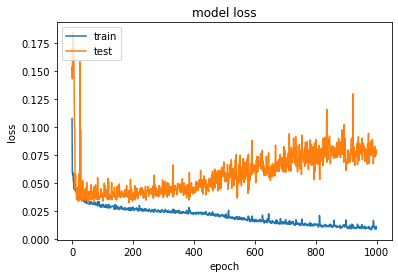

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

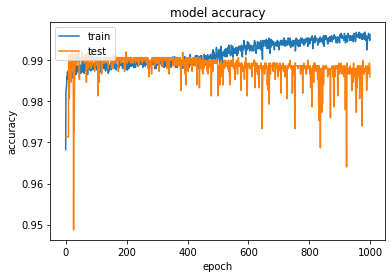

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
keras.backend.clear_session()